## MACHINE LEARNING MODEL FOR TELECOM CUSTOMER CHURN PREDICTION

In [1]:
#import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import random
import seaborn as sns
import warnings

from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.utils import resample
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.feature_selection import SequentialFeatureSelector as sfs,RFE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score, recall_score, f1_score
from sklearn.metrics import cohen_kappa_score,roc_auc_score,roc_curve,plot_confusion_matrix,plot_roc_curve
from sklearn.feature_selection import SequentialFeatureSelector as sfs,RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import ConvergenceWarning
import warnings

In [2]:
#Loading and preview the data set
df =pd.read_csv('telecom_churn.csv')
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


## DATA STRUCTURE AND STATISTICAL ANALYSIS

In [3]:
#Preview the dataseat (Displaying the top 10 rows of the data set)

df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
#(Displaying the top 10 rows of the data set)
df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [5]:
#Checking the shape of the dataset

df.shape

(3333, 20)

In [6]:
#Checking the shape of the dataset
df.size

66660

In [7]:
#Checking for Duplicate values
df.duplicated().sum()

0

In [8]:
#Getting info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [9]:
#descriptive statiscics (Sum, Average, Variance, minimum, 1st quartile, 2nd quartile, 3rd Quartile and Maximum)
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## DATA PREPARATION / PROCESSING

In [10]:
#getting the list of the column in the dataset
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [11]:
#check for missing value
df.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [12]:
# Check for unique values in categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    unique_values = df[col].unique()
    print(f"Unique values in '{col}': {unique_values}")

Unique values in 'State': ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
Unique values in 'International plan': ['No' 'Yes']
Unique values in 'Voice mail plan': ['Yes' 'No']


In [13]:
# Selecting only numerical columns
numerical_features = df.select_dtypes(include=['int64', 'float64'])

# Calculating basic statistics
statistics_summary = numerical_features.describe()

# Transposing the summary for better readability
statistics_summary = statistics_summary.transpose()

# Displaying the summary
print(statistics_summary)


                         count        mean        std     min     25%     50%  \
Account length          3333.0  101.064806  39.822106    1.00   74.00  101.00   
Area code               3333.0  437.182418  42.371290  408.00  408.00  415.00   
Number vmail messages   3333.0    8.099010  13.688365    0.00    0.00    0.00   
Total day minutes       3333.0  179.775098  54.467389    0.00  143.70  179.40   
Total day calls         3333.0  100.435644  20.069084    0.00   87.00  101.00   
Total day charge        3333.0   30.562307   9.259435    0.00   24.43   30.50   
Total eve minutes       3333.0  200.980348  50.713844    0.00  166.60  201.40   
Total eve calls         3333.0  100.114311  19.922625    0.00   87.00  100.00   
Total eve charge        3333.0   17.083540   4.310668    0.00   14.16   17.12   
Total night minutes     3333.0  200.872037  50.573847   23.20  167.00  201.20   
Total night calls       3333.0  100.107711  19.568609   33.00   87.00  100.00   
Total night charge      3333

In [14]:
# Selecting only numerical columns
numerical_features = df.select_dtypes(include=['int64', 'float64'])

# Detect outliers using z-score method
z_scores = zscore(numerical_features)
outlier_indices = (np.abs(z_scores) > 3).any(axis=1)

# Print outliers
outliers = df[outlier_indices]
print("Outliers:")
print(outliers)

Outliers:
     State  Account length  Area code International plan Voice mail plan  \
22      AZ             130        415                 No              No   
32      LA             172        408                 No              No   
41      MD             135        408                Yes             Yes   
58      WI              68        415                 No              No   
115     ME              36        510                Yes             Yes   
...    ...             ...        ...                ...             ...   
3247    OK             146        510                 No              No   
3275    NY             120        510                 No             Yes   
3290    CA             127        510                 No              No   
3291    MI             119        510                Yes             Yes   
3310    NY              94        415                 No              No   

      Number vmail messages  Total day minutes  Total day calls  \
22        

In [15]:
# Removing outliers
df = df[~outlier_indices]

In [16]:
# After removing outliers, reset the index
df.reset_index(drop=True, inplace=True)

# Updated accordingly
print("DataFrame after removing outliers:")
print(df)

DataFrame after removing outliers:
     State  Account length  Area code International plan Voice mail plan  \
0       KS             128        415                 No             Yes   
1       OH             107        415                 No             Yes   
2       NJ             137        415                 No              No   
3       OH              84        408                Yes              No   
4       OK              75        415                Yes              No   
...    ...             ...        ...                ...             ...   
3164    AZ             192        415                 No             Yes   
3165    WV              68        415                 No              No   
3166    RI              28        510                 No              No   
3167    CT             184        510                Yes              No   
3168    TN              74        415                 No             Yes   

      Number vmail messages  Total day minutes  Tota

## EXPLORATORY DATA ANALYSIS

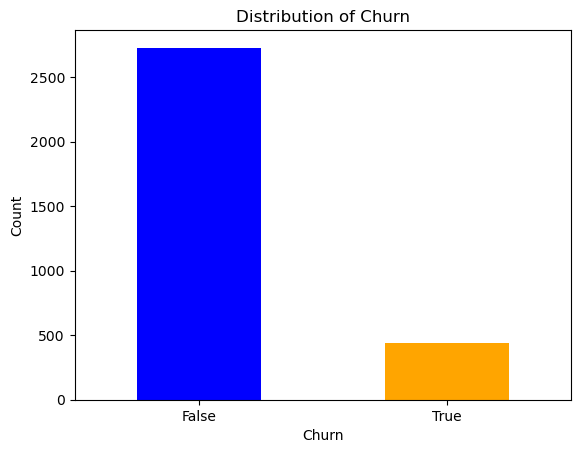

Class Balance:
False    0.860524
True     0.139476
Name: Churn, dtype: float64


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the telecom customer data
# Replace 'df' with the actual name of your DataFrame if it's different

# Plot the distribution of the target variable "Churn"
churn_distribution = df['Churn'].value_counts()
churn_distribution.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Calculate class balance
class_balance = df['Churn'].value_counts(normalize=True)
print("Class Balance:")
print(class_balance)


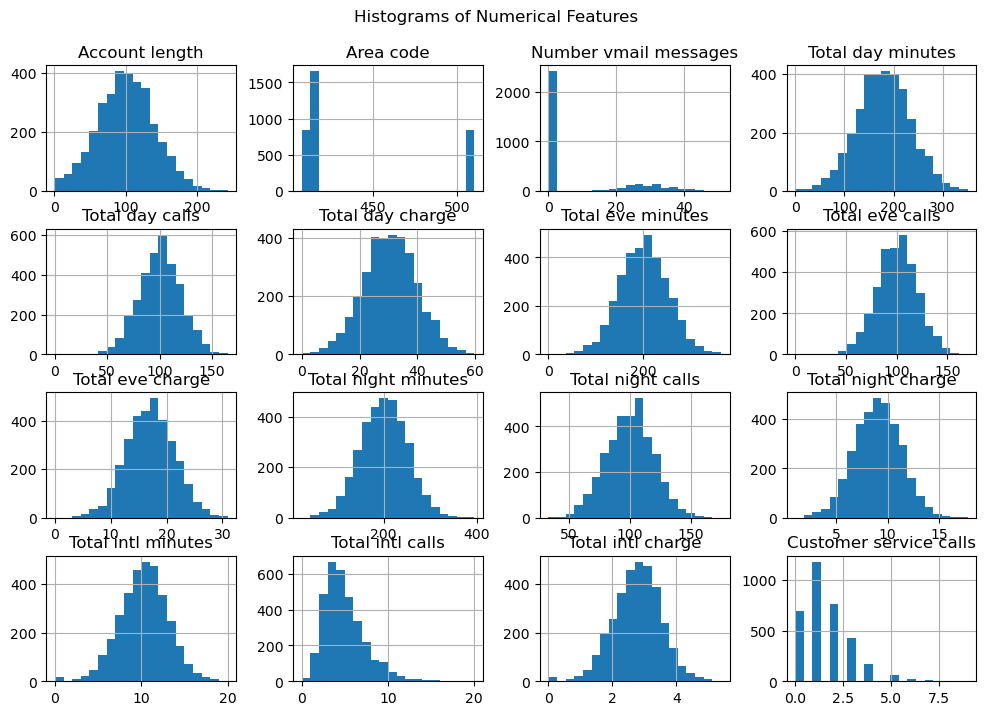

In [18]:
# Plot histograms for numerical features
numerical_features.hist(figsize=(12, 8), bins=20)
plt.suptitle('Histograms of Numerical Features', y=0.95)
plt.show()

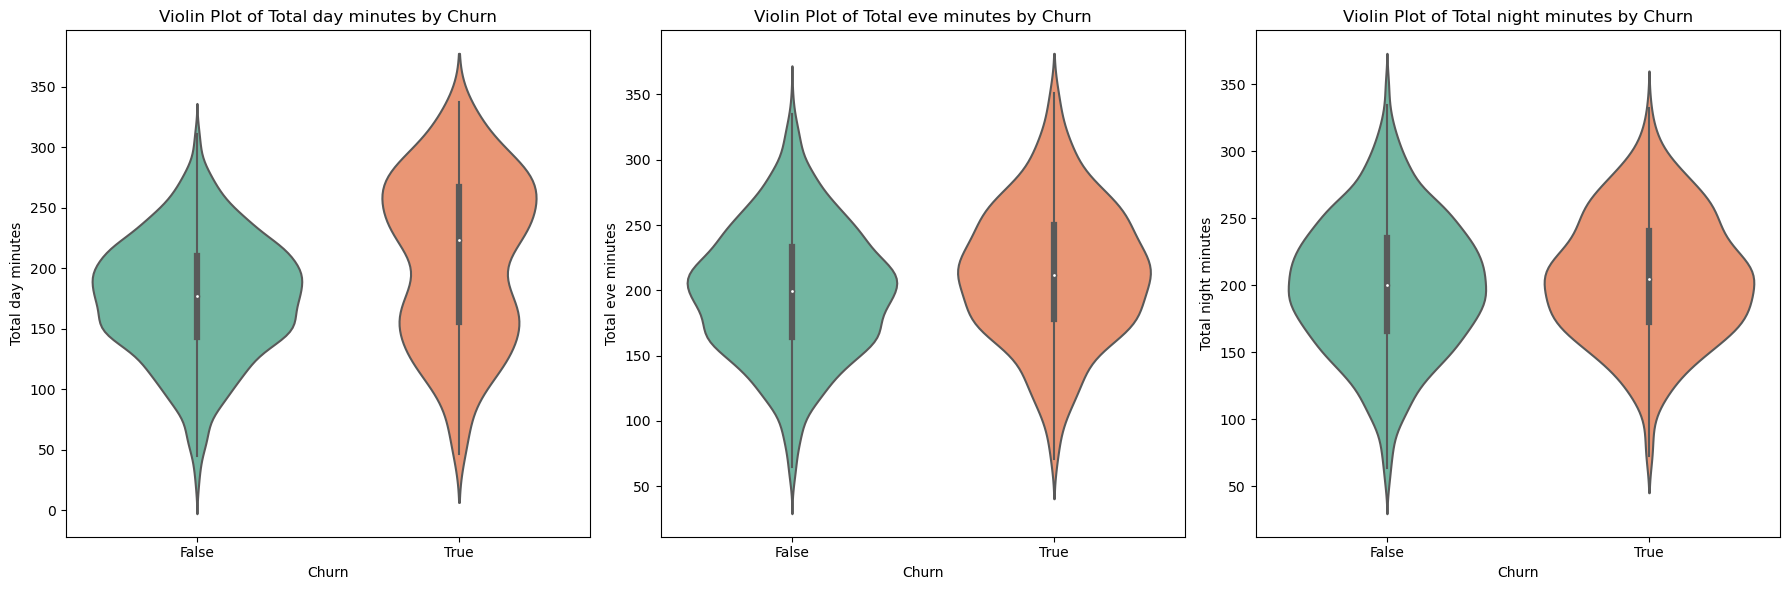

In [19]:
# Select multiple numerical features for violin plots
numerical_features = ['Total day minutes', 'Total eve minutes', 'Total night minutes']

# Violin plots for numerical features showing total minutes spent by customers
plt.figure(figsize=(18, 6))
for i, feature in enumerate(numerical_features, start=1):
    plt.subplot(1, len(numerical_features), i)
    sns.violinplot(data=df, x='Churn', y=feature, palette='Set2')
    plt.title(f'Violin Plot of {feature} by Churn')
    plt.xlabel('Churn')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

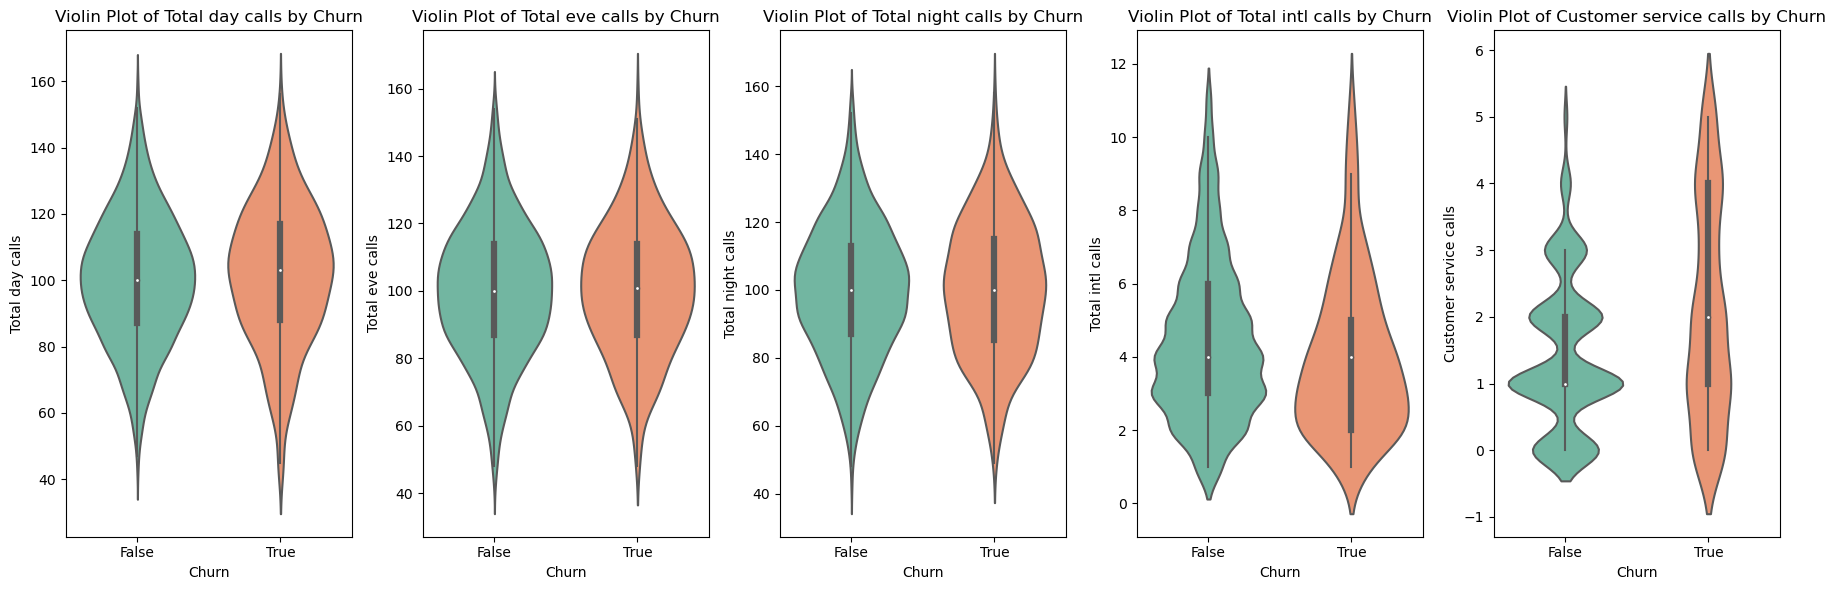

In [20]:
# Select multiple numerical features for violin plots
numerical_features = ['Total day calls', 'Total eve calls', 'Total night calls', 'Total intl calls', 'Customer service calls']

# Plot violin plots for multiple numerical features showing total calls of customers
plt.figure(figsize=(18, 6))
for i, feature in enumerate(numerical_features, start=1):
    plt.subplot(1, len(numerical_features), i)
    sns.violinplot(data=df, x='Churn', y=feature, palette='Set2')
    plt.title(f'Violin Plot of {feature} by Churn')
    plt.xlabel('Churn')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

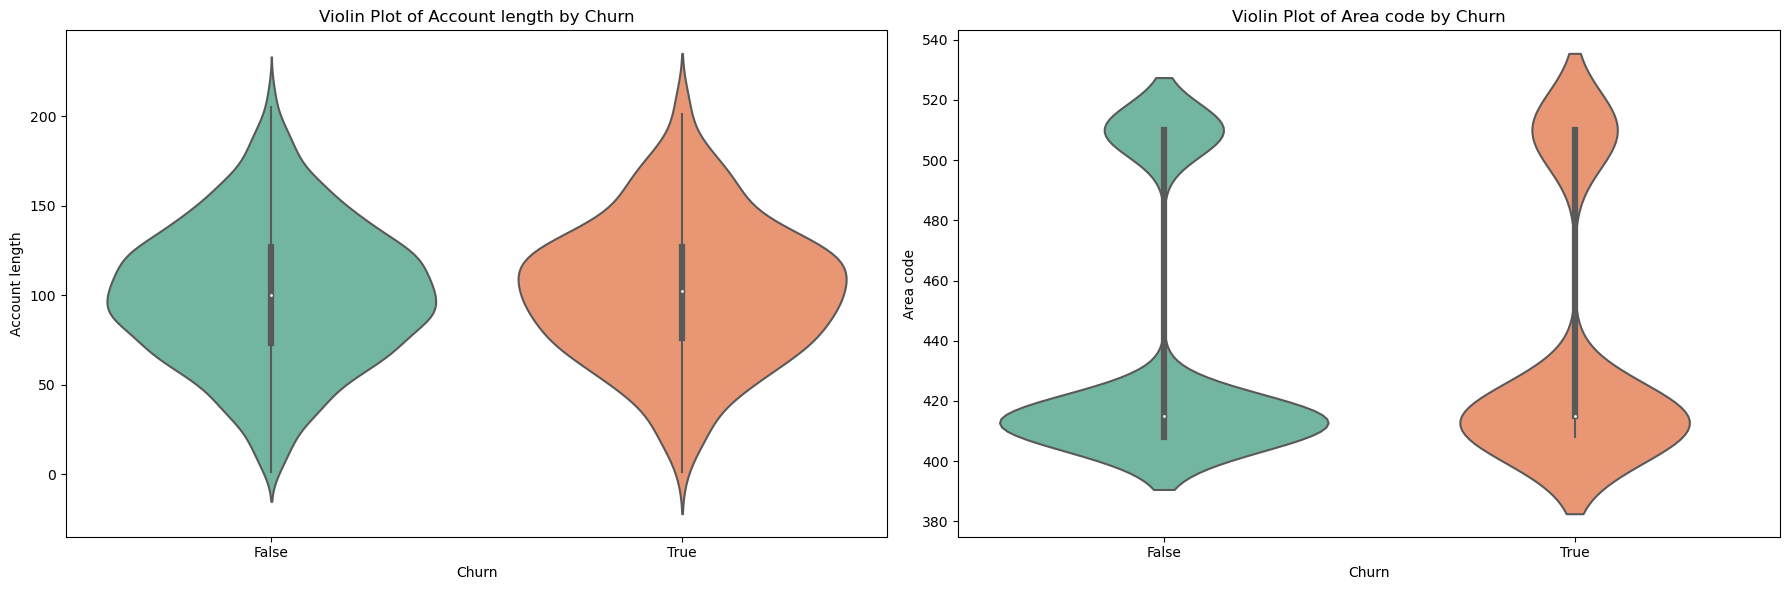

In [21]:
# Select multiple numerical features for violin plots
numerical_features = ['Account length', 'Area code']

# Plot violin plots for multiple numerical features showing total calls of customers
plt.figure(figsize=(18, 6))
for i, feature in enumerate(numerical_features, start=1):
    plt.subplot(1, len(numerical_features), i)
    sns.violinplot(data=df, x='Churn', y=feature, palette='Set2')
    plt.title(f'Violin Plot of {feature} by Churn')
    plt.xlabel('Churn')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

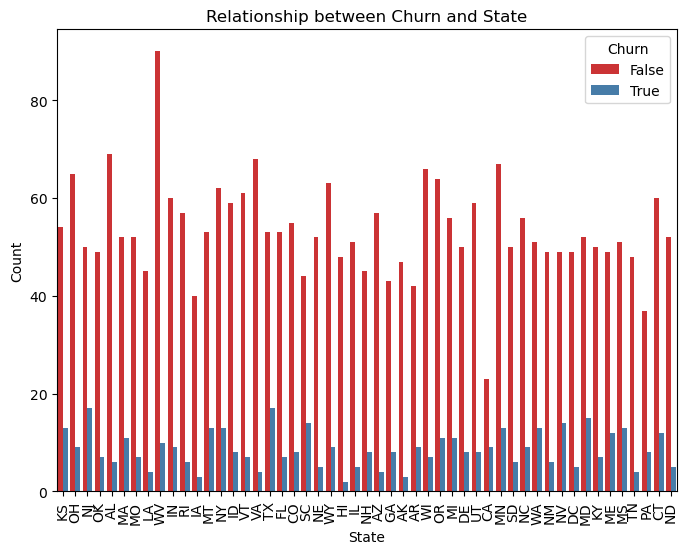

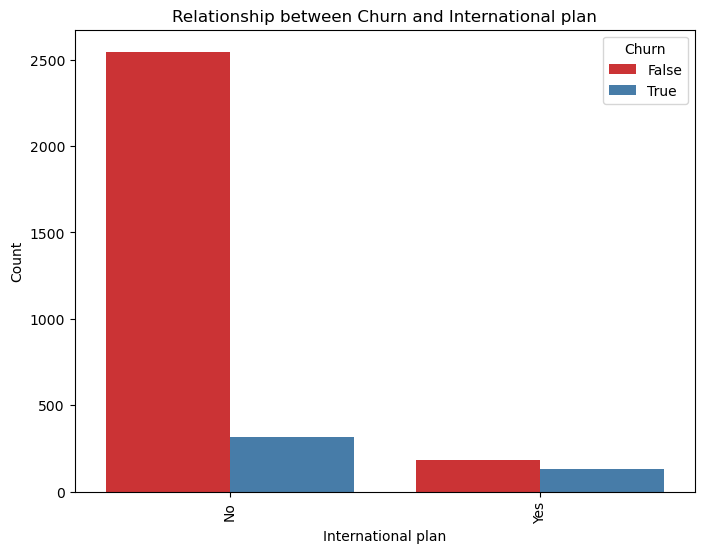

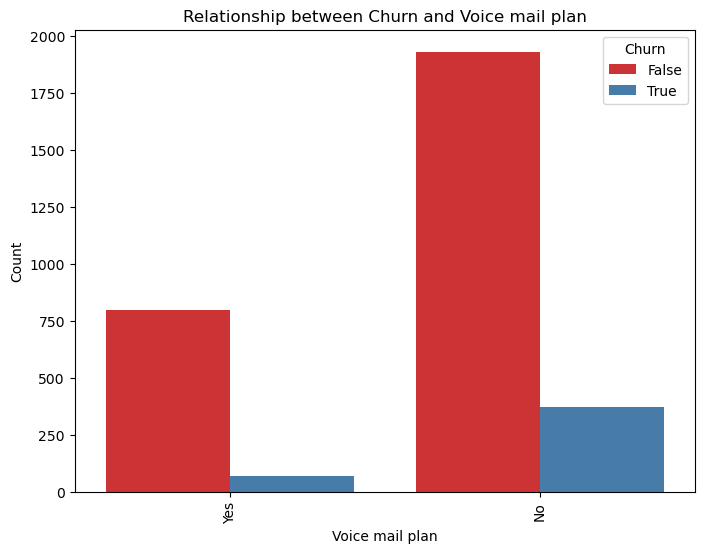

In [22]:
# Explore the relationship between 'Churn' and categorical features
categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=feature, hue='Churn', palette='Set1')
    plt.title(f'Relationship between Churn and {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.legend(title='Churn', loc='upper right')
    plt.show()

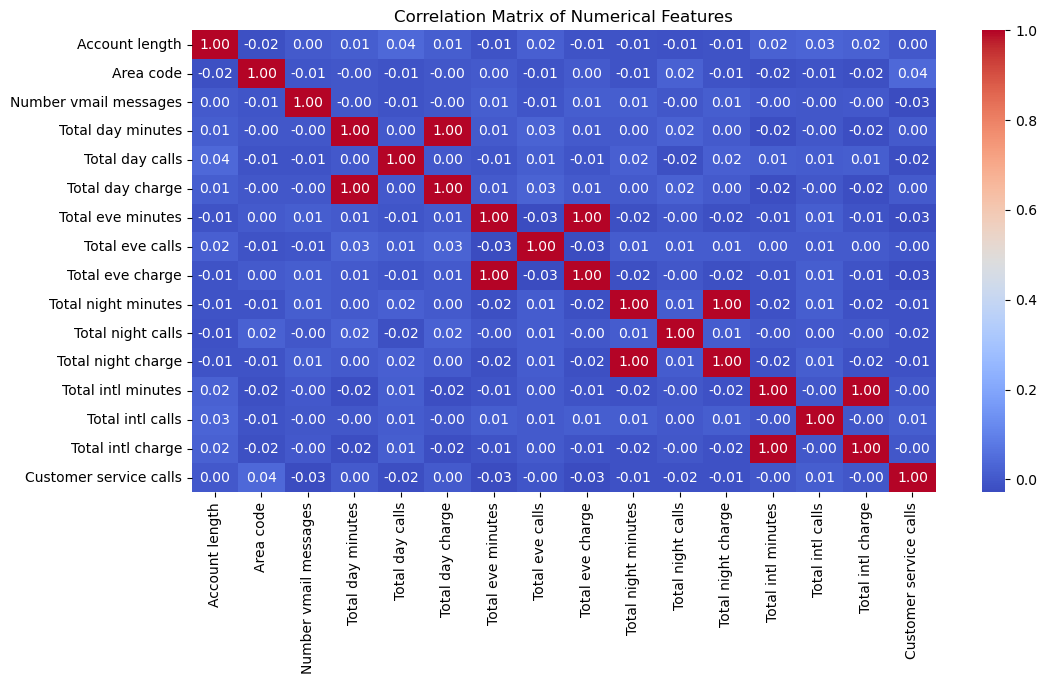

In [23]:
# Calculate the correlation matrix between numerical features
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


## FEATURE ENGINEERING

In [24]:
# Drop unwanted column
df = df.drop(['Area code'], axis = 1)

In [25]:
# Deep copy of the DataFrame
df_copy = df.copy()

# Convert 'Churn' column to integer (0 for False, 1 for True) using .loc
df_copy.loc[:, 'Churn'] = df_copy['Churn'].astype(int)

In [26]:
# Iterates over a list of categorical columns in the DataFrame
categorical_columns = ['State', 'International plan', 'Voice mail plan']

for col in categorical_columns:
    unique_values = df[col].unique()
    print(f"Unique values in '{col}': {unique_values}")


Unique values in 'State': ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'AZ' 'GA'
 'AK' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM' 'NV'
 'DC' 'MD' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
Unique values in 'International plan': ['No' 'Yes']
Unique values in 'Voice mail plan': ['Yes' 'No']


In [27]:
# Perform one-hot encoding for categorical columns
df = pd.get_dummies(df, columns=['State', 'International plan', 'Voice mail plan'], drop_first=True)

# Preview the information about the DataFrame to verify encoding
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169 entries, 0 to 3168
Data columns (total 68 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          3169 non-null   int64  
 1   Number vmail messages   3169 non-null   int64  
 2   Total day minutes       3169 non-null   float64
 3   Total day calls         3169 non-null   int64  
 4   Total day charge        3169 non-null   float64
 5   Total eve minutes       3169 non-null   float64
 6   Total eve calls         3169 non-null   int64  
 7   Total eve charge        3169 non-null   float64
 8   Total night minutes     3169 non-null   float64
 9   Total night calls       3169 non-null   int64  
 10  Total night charge      3169 non-null   float64
 11  Total intl minutes      3169 non-null   float64
 12  Total intl calls        3169 non-null   int64  
 13  Total intl charge       3169 non-null   float64
 14  Customer service calls  3169 non-null   

In [28]:
#Splitting the datasewt to Train and Test Set
x = df.drop('Churn', axis = 1)
y = df['Churn']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

## FEATURE SELECTION

In [29]:
# select the columns statistical relevance to our tarhet variable usin ANOVA F-value
# Select top 10 features using ANOVA F-value test
selector = SelectKBest(score_func=f_classif, k=10)
x_new = selector.fit_transform(x, y)

# Get the indices of the selected features
selected_features = selector.get_support(indices=True)

# Print the selected feature names
feature_names = list(x.columns[selected_features])
print(feature_names)

['Number vmail messages', 'Total day minutes', 'Total day charge', 'Total eve minutes', 'Total eve charge', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'International plan_Yes', 'Voice mail plan_Yes']


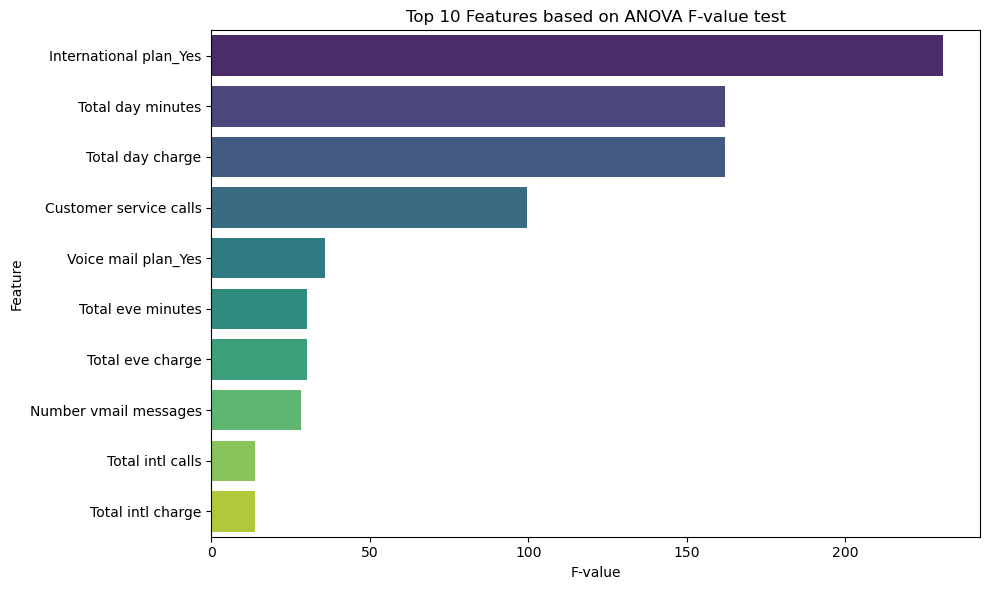

In [30]:
# select the columns statistical relevance to our target variable using ANOVA F-value

# create a new DataFrame with the selected columns
Telecom_churn_df = df

# split the data into features and target
x = Telecom_churn_df.drop(['Churn'], axis=1)
y = Telecom_churn_df['Churn']

# perform ANOVA F-value test
f_values, p_values = f_classif(x, y)

# create a DataFrame with the F-values and corresponding feature names
f_df = pd.DataFrame({'Feature': x.columns, 'F-value': f_values})

# sort the DataFrame by F-value in descending order and select the top 10 features
top_features = f_df.sort_values(by='F-value', ascending=False).head(10)

# plot the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='F-value', y='Feature', data=top_features, palette='viridis')
plt.title('Top 10 Features based on ANOVA F-value test')
plt.xlabel('F-value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [31]:
#Standardizing the data using Standard Scaler

# Extract the top 10 features
top_features = ['Number vmail messages', 'Total day minutes', 'Total day charge', 'Total eve minutes', 'Total eve charge', 
                'Total intl calls', 'Total intl charge', 'Customer service calls', 'International plan_Yes', 
                'Voice mail plan_Yes']

# Keep only the top 10 features in the training and testing data
x_train = x_train[top_features]
x_test = x_test[top_features]

scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

x_train = pd.DataFrame(x_train_scaler, columns=x_train.columns)
x_test = pd.DataFrame(x_test_scaler, columns=x_test.columns)


display(x_train.head())
display(x_test.head())

,Number vmail messages,Total day minutes,Total day charge,Total eve minutes,Total eve charge,Total intl calls,Total intl charge,Customer service calls,International plan_Yes,Voice mail plan_Yes
0,-0.587491,-0.381692,-0.381315,-1.610840,-1.611824,-0.639595,0.095928,0.404797,-0.326349,-0.613978
1,0.808350,-0.041859,-0.041589,0.222620,0.223039,0.752540,-0.126304,-0.420091,-0.326349,1.628723
2,-0.587491,0.060277,0.060001,-1.604887,-1.604821,-1.103640,0.887632,-0.420091,-0.326349,-0.613978
3,-0.587491,2.192130,2.192297,1.367541,1.366911,-1.103640,0.693178,-1.244978,3.064204,-0.613978
4,-0.587491,0.663807,0.664079,-0.080972,-0.080437,-0.639595,-0.195752,-0.420091,-0.326349,-0.613978


,Number vmail messages,Total day minutes,Total day charge,Total eve minutes,Total eve charge,Total intl calls,Total intl charge,Customer service calls,International plan_Yes,Voice mail plan_Yes
0,-0.587491,1.523605,1.523770,-0.138516,-0.138798,0.752540,-0.765223,0.404797,-0.326349,-0.613978
1,-0.587491,-1.369624,-1.369905,1.651291,1.651711,1.216585,1.707114,-0.420091,-0.326349,-0.613978
2,-0.587491,-0.632389,-0.632559,-0.590928,-0.591678,2.144675,-1.890275,-0.420091,-0.326349,-0.613978
3,-0.587491,1.800300,1.800138,0.532166,0.531184,-0.175550,0.929300,0.404797,-0.326349,-0.613978
4,-0.587491,0.747373,0.747098,-0.920316,-0.920833,3.072765,0.068149,-0.420091,-0.326349,-0.613978


In [32]:
# checking the shape of the train and test datasets

print("The shape of x_train_scaler is: ",x_train_scaler.shape)
print("The shape of x_test_scaler is: ",x_test_scaler.shape)
print("The shape of y_train is: ",y_train.shape)
print("The shape of y_test is: ",y_test.shape)

The shape of x_train_scaler is:  (2535, 10)
The shape of x_test_scaler is:  (634, 10)
The shape of y_train is:  (2535,)
The shape of y_test is:  (634,)


## MODEL IMPLEMENTATION

In [33]:
# Train multiple machine learning models on the training data and evaluating their performance
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gnb = GaussianNB()

model_list = [lr,dt,rf,gnb]

train_acc = []
test_acc = []

for i in model_list:
    i_model = i.fit(x_train_scaler,y_train)
    y_train_pred = i_model.predict(x_train_scaler)
    y_test_pred = i_model.predict(x_test_scaler)
    train_acc.append(accuracy_score(y_train,y_train_pred))
    test_acc.append(accuracy_score(y_test,y_test_pred))

In [34]:
# Create a dictionary to store the classifiers
classifiers = {
    'Logistic Regression': lr,
    'Decision Tree': dt,
    'Random Forest': rf,
    'Gaussian Naive Bayes': gnb
}

# Loop through the classifiers and display the classification report
for name, clf in classifiers.items():
    print('Classification Report for', name)
    y_pred = clf.predict(x_test_scaler)
    print(classification_report(y_test_pred, y_pred))

Classification Report for Logistic Regression
              precision    recall  f1-score   support

       False       0.89      1.00      0.94       542
        True       1.00      0.25      0.40        92

    accuracy                           0.89       634
   macro avg       0.94      0.62      0.67       634
weighted avg       0.90      0.89      0.86       634

Classification Report for Decision Tree
              precision    recall  f1-score   support

       False       0.92      0.91      0.91       542
        True       0.48      0.51      0.50        92

    accuracy                           0.85       634
   macro avg       0.70      0.71      0.70       634
weighted avg       0.85      0.85      0.85       634

Classification Report for Random Forest
              precision    recall  f1-score   support

       False       0.92      0.93      0.93       542
        True       0.58      0.53      0.55        92

    accuracy                           0.88       634
  

In [35]:
#plot confusion matrix
models = [lr, dt, rf, gnb]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gaussian Naive Bayes']

for i, model in enumerate(models):
    # Fit the model to the training data
    model.fit(x_train_scaler, y_train_pred)
   
    # Make predictions on the test data
    y_pred = model.predict(x_test_scaler)
   
    # Evaluate the performance of the model
    cm = confusion_matrix(y_test_pred, y_pred)
    print(f"Confusion Matrix - {model_names[i]}:\n{cm}\n")

Confusion Matrix - Logistic Regression:
[[539   3]
 [ 13  79]]

Confusion Matrix - Decision Tree:
[[530  12]
 [ 15  77]]

Confusion Matrix - Random Forest:
[[537   5]
 [ 14  78]]

Confusion Matrix - Gaussian Naive Bayes:
[[538   4]
 [ 18  74]]



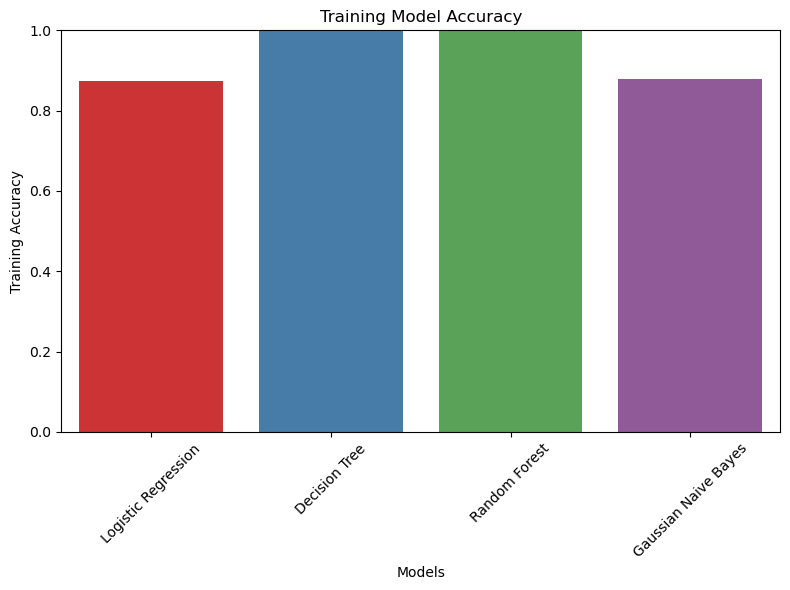

In [36]:
# Models list
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gaussian Naive Bayes']

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=train_acc, palette='Set1')
plt.xlabel('Models')
plt.ylabel('Training Accuracy')
plt.title('Training Model Accuracy')
plt.ylim(0, 1) 
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()


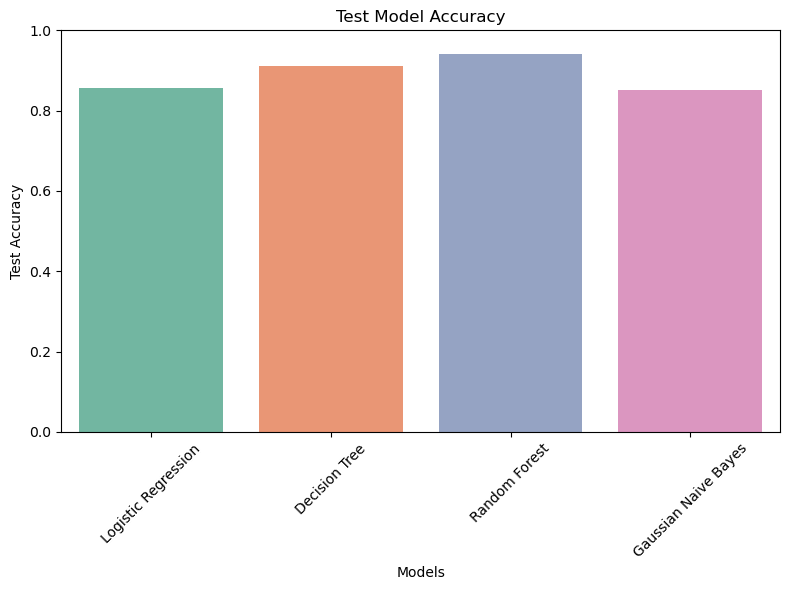

In [37]:
plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=test_acc, palette='Set2')
plt.xlabel('Models')
plt.ylabel('Test Accuracy')
plt.title('Test Model Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

In [38]:
#Display summary of the performance
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gnb = GaussianNB()


model_dict = {'Model':model_list,'Train Score':train_acc,'Test Score':test_acc}
model_dict

{'Model': [LogisticRegression(),
  DecisionTreeClassifier(),
  RandomForestClassifier(),
  GaussianNB()],
 'Train Score': [0.8745562130177514, 1.0, 1.0, 0.8781065088757396],
 'Test Score': [0.8564668769716088,
  0.9100946372239748,
  0.9416403785488959,
  0.8517350157728707]}

In [39]:
#plot a table to show the summary
model_summary = pd.DataFrame({'Model':model_list,'Train Score':train_acc,'Test Score':test_acc})
model_summary

,Model,Train Score,Test Score
0,LogisticRegression(),0.874556,0.856467
1,DecisionTreeClassifier(),1.000000,0.910095
2,"(DecisionTreeClassifier(max_features='sqrt', r...",1.000000,0.941640
3,GaussianNB(),0.878107,0.851735


In [40]:
#create model list for ROC curve
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gaussian Naive Bayes']

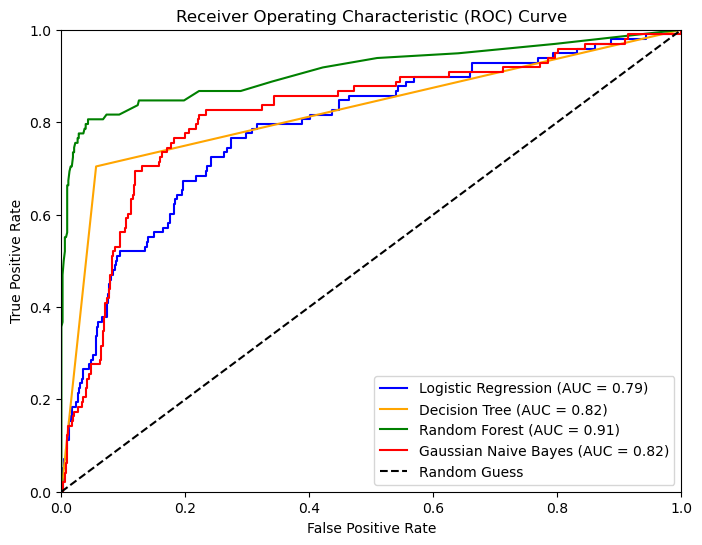

In [41]:
# Generate visual representation of the ROC curves for multiple machine learning models
model_list = [lr, dt, rf, gnb]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gaussian Naive Bayes']
colors = ['blue', 'orange', 'green', 'red']

plt.figure(figsize=(8, 6))

for i, model in enumerate(model_list):
    model.fit(x_train, y_train)
    y_pred_prob = model.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, color=colors[i], label=model_names[i] + ' (AUC = {:.2f})'.format(auc))

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## MODEL OPTIMIZATION

In [42]:
#Undersampling the target variables

y = df['Churn'] # target variable
target = y

# Separate majority and minority classes
majority_class = df[y == 0]
minority_class = df[y == 1]

# Undersample majority class
undersampled_majority = resample(majority_class,
                                 replace=False, # sampling without replacement
                                 n_samples=len(minority_class), # set the number of samples to match the minority class
                                 random_state=42) # for reproducibility

# Combine minority class and undersampled majority class
undersampled_Churn = pd.concat([minority_class, undersampled_majority])

# Shuffle the data
undersampled_df = undersampled_Churn.sample(frac=1, random_state=42)
print("Shape of undersampled_Churn:", undersampled_Churn.shape)

Shape of undersampled_Churn: (884, 68)


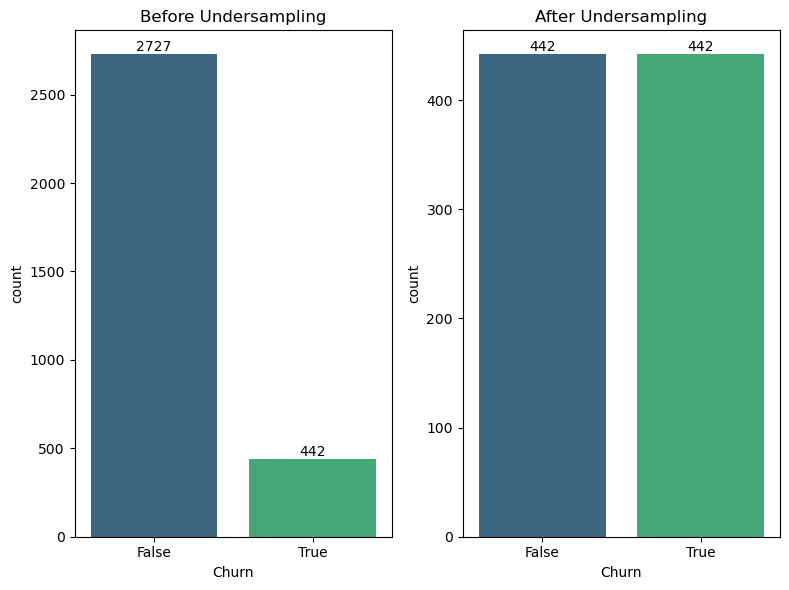

In [43]:
# Plot distribution of target variable before and after undersampling
fig, axs = plt.subplots(ncols=2, figsize=(8, 6))

# Before Undersampling
sns.countplot(data=df, x='Churn', ax=axs[0], palette='viridis')
for container in axs[0].containers:
    axs[0].bar_label(container)
axs[0].set_title('Before Undersampling')

# After Undersampling
sns.countplot(data=undersampled_df, x='Churn', ax=axs[1], palette='viridis')
for container in axs[1].containers:
    axs[1].bar_label(container)
axs[1].set_title('After Undersampling')

plt.tight_layout()
plt.show()

In [44]:
top_features =  ['Number vmail messages', 'Total day minutes', 'Total day charge', 'Total eve minutes',
                 'Total eve charge', 'Total intl calls', 'Total intl charge', 'Customer service calls', 
                 'International plan_Yes', 'Voice mail plan_Yes']



# Apply feature selection on undersampled data
x_selected = undersampled_df[top_features]
y_selected = y[x_selected.index]


# Split into training and testing sets
x_train_selected, x_test_selected, y_train_res, y_test_res = train_test_split(x_selected, y_selected, test_size=0.2, random_state=42)

# Scale the training and testing data separately
scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train_selected)
x_test_scaler = scaler.transform(x_test_selected)

# Convert the scaled arrays to Pandas DataFrames with feature names
x_train_scaler = pd.DataFrame(x_train_scaler, columns=x_selected.columns)
x_test_scaler = pd.DataFrame(x_test_scaler, columns=x_selected.columns)

# Print the shapes of the new datasets
print("Shape of x_train_scaler:", x_train_scaler.shape)
print("Shape of x_test_scaler:", x_test_scaler.shape)
print("Shape of y_train_res:", y_train_res.shape)
print("Shape of y_test_res:", y_test_res.shape)

Shape of x_train_scaler: (707, 10)
Shape of x_test_scaler: (177, 10)
Shape of y_train_res: (707,)
Shape of y_test_res: (177,)


In [45]:
#Cretae list of models

models = [
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    GaussianNB(),
    LogisticRegression(random_state=42)
]

# Perform k-fold cross-validation with k=5 for each model
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for model in models:
    cv_results = cross_val_score(model, x_train_scaler, y_train_res, cv=kf)
    print(f"Accuracy for {model.__class__.__name__}: {cv_results}")
    print(f"Average accuracy for {model.__class__.__name__}: {cv_results.mean()}\n")

Accuracy for DecisionTreeClassifier: [0.85915493 0.82394366 0.78014184 0.79432624 0.80141844]
Average accuracy for DecisionTreeClassifier: 0.8117970232743982

Accuracy for RandomForestClassifier: [0.8943662  0.86619718 0.87943262 0.84397163 0.90070922]
Average accuracy for RandomForestClassifier: 0.876935371091799

Accuracy for GaussianNB: [0.85915493 0.78873239 0.80141844 0.79432624 0.85106383]
Average accuracy for GaussianNB: 0.8189391669163921

Accuracy for LogisticRegression: [0.80985915 0.78873239 0.78014184 0.73758865 0.78014184]
Average accuracy for LogisticRegression: 0.7792927779442613



In [46]:
# Define the hyperparameter search space for each model
dt_param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6]
}

lr_param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'max_iter': [1000]
}

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6]
}

gnb_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

# Instantiate each model
dt = DecisionTreeClassifier(random_state=42)
lr = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
gnb = GaussianNB()

In [47]:
dt_grid_search = GridSearchCV(dt, dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(x_train_scaler, y_train_res)

#Train the final model on the entire resampled training set with the best hyperparameters for each model
best_dt = DecisionTreeClassifier(**dt_grid_search.best_params_, random_state=42)
best_dt.fit(x_train_scaler, y_train_res)
# Get the training accuracy score
train_dt_accuracy = best_dt.score(x_train_scaler, y_train_res)

# Evaluate the final models on the test set for each model
dt_y_pred = best_dt.predict(x_test_scaler)
dt_accuracy = accuracy_score(y_test_res, dt_y_pred)
dt_confusion = confusion_matrix(y_test_res, dt_y_pred)

# Print the evaluation results
print("Decision Tree Classifier")
print("Training Accuracy:", train_dt_accuracy)
print("Test Accuracy:", dt_accuracy)

Decision Tree Classifier
Training Accuracy: 0.9222065063649222
Test Accuracy: 0.8587570621468926


In [48]:
print("Confusion matrix:\n", confusion_matrix(y_test_res, dt_y_pred))
print("Classification report:\n", classification_report(y_test_res, dt_y_pred))

Confusion matrix:
 [[69  9]
 [16 83]]
Classification report:
               precision    recall  f1-score   support

       False       0.81      0.88      0.85        78
        True       0.90      0.84      0.87        99

    accuracy                           0.86       177
   macro avg       0.86      0.86      0.86       177
weighted avg       0.86      0.86      0.86       177



In [49]:
lr_grid_search = GridSearchCV(lr, lr_param_grid, cv=5, scoring='accuracy')
lr_grid_search.fit(x_train_scaler, y_train_res)

# Train the final model on the entire resampled training set with the best hyperparameters for each model
best_lr = LogisticRegression(**lr_grid_search.best_params_, random_state=42)
best_lr.fit(x_train_scaler, y_train_res)

# Get the training accuracy score
train_lr_accuracy = best_lr.score(x_train_scaler, y_train_res)

# Evaluate the final model on the test set
lr_y_pred = best_lr.predict(x_test_scaler)
lr_accuracy = accuracy_score(y_test_res, lr_y_pred)
lr_confusion = confusion_matrix(y_test_res, lr_y_pred)

# Print the evaluation results
print("Logistic Regression")
print("Training Accuracy:", train_lr_accuracy)
print("Test Accuracy:", lr_accuracy)

Logistic Regression
Training Accuracy: 0.785007072135785
Test Accuracy: 0.7344632768361582


In [50]:
print("Confusion matrix:\n", confusion_matrix(y_test_res, lr_y_pred))
print("Classification report:\n", classification_report(y_test_res, lr_y_pred))

Confusion matrix:
 [[59 19]
 [28 71]]
Classification report:
               precision    recall  f1-score   support

       False       0.68      0.76      0.72        78
        True       0.79      0.72      0.75        99

    accuracy                           0.73       177
   macro avg       0.73      0.74      0.73       177
weighted avg       0.74      0.73      0.74       177



In [51]:
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(x_train_scaler, y_train_res)

#Train the final model on the entire resampled training set with the best hyperparameters for each model
best_rf = RandomForestClassifier(**rf_grid_search.best_params_, random_state=42)
best_rf.fit(x_train_scaler, y_train_res)

# Get the training accuracy score
train_rf_accuracy = best_rf.score(x_train_scaler, y_train_res)


# Evaluate the final models on the test set for each model
rf_y_pred = best_rf.predict(x_test_scaler)
rf_accuracy = accuracy_score(y_test_res, rf_y_pred)
rf_confusion = confusion_matrix(y_test_res, rf_y_pred)

# Print the evaluation results
print("RandomForestClassifier")
print("Training Accuracy:", train_rf_accuracy)
print("Test Accuracy:", rf_accuracy)

RandomForestClassifier
Training Accuracy: 0.9490806223479491
Test Accuracy: 0.864406779661017


In [52]:
print("Confusion matrix:\n", confusion_matrix(y_test_res, rf_y_pred))
print("Classification report:\n", classification_report(y_test_res, rf_y_pred))

Confusion matrix:
 [[70  8]
 [16 83]]
Classification report:
               precision    recall  f1-score   support

       False       0.81      0.90      0.85        78
        True       0.91      0.84      0.87        99

    accuracy                           0.86       177
   macro avg       0.86      0.87      0.86       177
weighted avg       0.87      0.86      0.86       177



In [53]:
gnb_grid_search = GridSearchCV(gnb, gnb_param_grid, cv=5, scoring='accuracy')
gnb_grid_search.fit(x_train_scaler, y_train_res)

#Train the final model on the entire resampled training set with the best hyperparameters for each model
best_gnb = GaussianNB(**gnb_grid_search.best_params_)
best_gnb.fit(x_train_scaler, y_train_res)

# Get the training accuracy score
train_gnb_accuracy = best_gnb.score(x_train_scaler, y_train_res)

# Evaluate the final models on the test set for each model
gnb_y_pred = best_gnb.predict(x_test_scaler)
gnb_accuracy = accuracy_score(y_test_res, gnb_y_pred)
gnb_confusion = confusion_matrix(y_test_res, gnb_y_pred)

# Print the evaluation results
print("GaussianNB")
print("Training Accuracy:", train_gnb_accuracy)
print("Test Accuracy:", gnb_accuracy)


GaussianNB
Training Accuracy: 0.8189533239038189
Test Accuracy: 0.8135593220338984


In [54]:
print("Confusion matrix:\n", confusion_matrix(y_test_res, gnb_y_pred))
print("Classification report:\n", classification_report(y_test_res, gnb_y_pred))

Confusion matrix:
 [[67 11]
 [22 77]]
Classification report:
               precision    recall  f1-score   support

       False       0.75      0.86      0.80        78
        True       0.88      0.78      0.82        99

    accuracy                           0.81       177
   macro avg       0.81      0.82      0.81       177
weighted avg       0.82      0.81      0.81       177



In [55]:
# Create a dictionary of model names and their evaluation results
results = {'Logistic Regression': [lr_accuracy,train_lr_accuracy],
           'Decision Tree': [dt_accuracy, train_dt_accuracy],
           'Random Forest': [rf_accuracy, train_rf_accuracy],
           'Gaussian NB': [gnb_accuracy, train_gnb_accuracy]}

# Convert the dictionary to a DataFrame
df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Test Accuracy', 'Training Accuracy'])

# Display the DataFrame
print(df_results)

                     Test Accuracy  Training Accuracy
Logistic Regression       0.734463           0.785007
Decision Tree             0.858757           0.922207
Random Forest             0.864407           0.949081
Gaussian NB               0.813559           0.818953


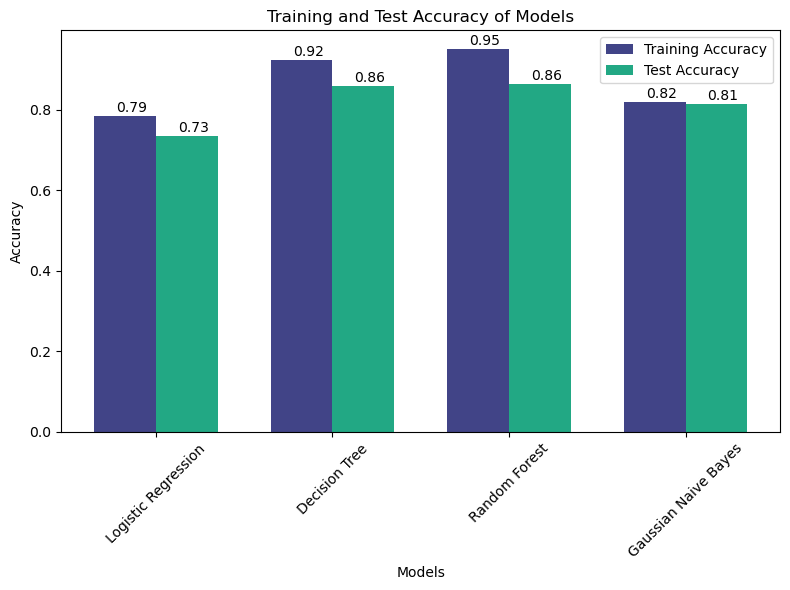

In [56]:
# Define model names and their training and test accuracy
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gaussian Naive Bayes']
train_accuracy = [train_lr_accuracy, train_dt_accuracy, train_rf_accuracy, train_gnb_accuracy]
test_accuracy = [lr_accuracy, dt_accuracy, rf_accuracy, gnb_accuracy]

# Set the bar width
bar_width = 0.35

# Define the index for the models
index = np.arange(len(models))

# Plotting the grouped bar chart
plt.figure(figsize=(8, 6))
plt.bar(index, train_accuracy, bar_width, label='Training Accuracy', color=plt.cm.viridis(0.2))
plt.bar(index + bar_width, test_accuracy, bar_width, label='Test Accuracy', color=plt.cm.viridis(0.6))

# Adding values on top of the bars
for i in range(len(models)):
    plt.text(index[i] - 0.05, train_accuracy[i] + 0.01, f'{train_accuracy[i]:.2f}', fontsize=10)
    plt.text(index[i] + bar_width - 0.05, test_accuracy[i] + 0.01, f'{test_accuracy[i]:.2f}', fontsize=10)

# Adding labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy of Models')
plt.xticks(index + bar_width / 2, models, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


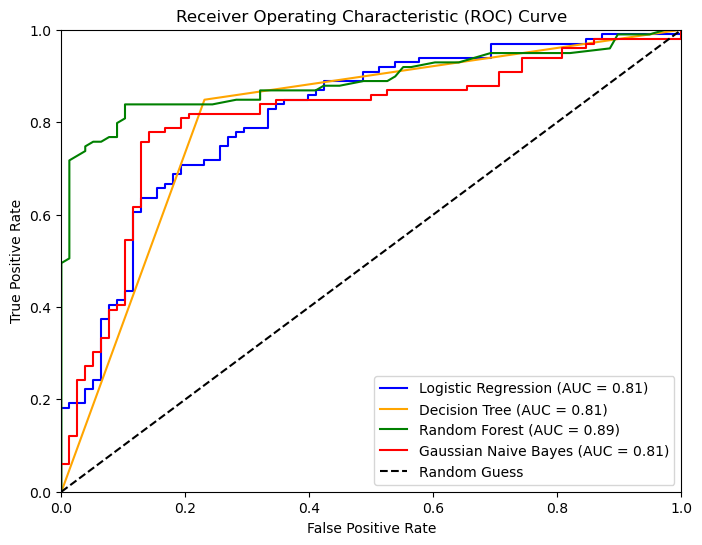

In [57]:
# Define the list of models and their corresponding names
model_list = [lr, dt, rf, gnb]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gaussian Naive Bayes']
colors = ['blue', 'orange', 'green', 'red']

plt.figure(figsize=(8, 6))

# Iterate over each model in the list
for i, model in enumerate(model_list):
    model.fit(x_train_scaler, y_train_res)
    y_pred_prob = model.predict_proba(x_test_scaler)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test_res, y_pred_prob)
    auc = roc_auc_score(y_test_res, y_pred_prob)
    plt.plot(fpr, tpr, color=colors[i], label=model_names[i] + ' (AUC = {:.2f})'.format(auc))

# Plor ROC Curve
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## FEATURE IMPORTANCE

In [58]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier model
rf_model = RandomForestClassifier()

# Fit the model on the training data
rf_model.fit(x_train_scaler, y_train_res)

# Get the feature importances
importances = pd.DataFrame({'Feature': x_train.columns, 'Importance': rf_model.feature_importances_})

In [59]:
importances['Feature_importances'] = rf_model.feature_importances_
importances

,Feature,Importance,Feature_importances
0,Number vmail messages,0.039910,0.039910
1,Total day minutes,0.181925,0.181925
2,Total day charge,0.175186,0.175186
3,Total eve minutes,0.091877,0.091877
4,Total eve charge,0.089236,0.089236
5,Total intl calls,0.052637,0.052637
6,Total intl charge,0.075292,0.075292
7,Customer service calls,0.168658,0.168658
8,International plan_Yes,0.107906,0.107906
9,Voice mail plan_Yes,0.017373,0.017373


In [60]:
imp = importances.sort_values(by='Feature_importances',ascending=False)
imp

,Feature,Importance,Feature_importances
1,Total day minutes,0.181925,0.181925
2,Total day charge,0.175186,0.175186
7,Customer service calls,0.168658,0.168658
8,International plan_Yes,0.107906,0.107906
3,Total eve minutes,0.091877,0.091877
4,Total eve charge,0.089236,0.089236
6,Total intl charge,0.075292,0.075292
5,Total intl calls,0.052637,0.052637
0,Number vmail messages,0.039910,0.039910
9,Voice mail plan_Yes,0.017373,0.017373


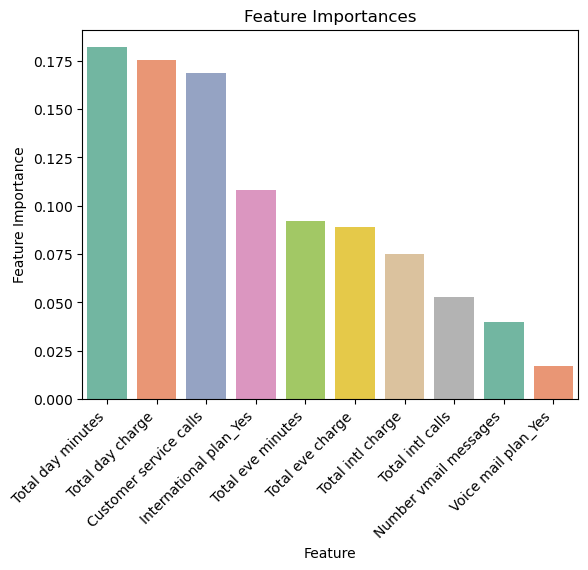

In [61]:
# Plotting the feature importances with seaborn's barplot
sns.barplot(x=imp['Feature'], y=imp['Feature_importances'], palette='Set2')

# Setting labels and title
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importances')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

In [63]:
# Important Features according to above mentioned Barplot:

imp['Feature'][0:7].values

array(['Total day minutes', 'Total day charge', 'Customer service calls',
       'International plan_Yes', 'Total eve minutes', 'Total eve charge',
       'Total intl charge'], dtype=object)